**Step 1: Data Loading and accessing**

In [ ]:
import pandas as pd

# Define file path
file_path = "/content/FedX Query result.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12364 entries, 0 to 12363
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Role                     12364 non-null  object
 1   Blood_Tests              12364 non-null  object
 2   Physical_Exam            12364 non-null  object
 3   Cardiovascular_Diseases  12364 non-null  object
 4   Signs_and_Symptoms       12364 non-null  object
 5   Patient_Role             12364 non-null  object
 6   Treatment                12364 non-null  object
 7   Person                   12364 non-null  object
 8   MedicalCondition         12364 non-null  object
 9   DoctorNote               12364 non-null  object
 10  Medication               12364 non-null  object
 11  treatment                12364 non-null  object
 12  Treatment_Id             12364 non-null  int64 
 13  Treatment_Date           12364 non-null  object
 14  dosage                   12363 non-nul

(None,
                                                 Role  \
 0  http://www.semanticweb.org/abid/ontologies/202...   
 1  http://www.semanticweb.org/abid/ontologies/202...   
 2  http://www.semanticweb.org/abid/ontologies/202...   
 3  http://www.semanticweb.org/abid/ontologies/202...   
 4  http://www.semanticweb.org/abid/ontologies/202...   
 
                                          Blood_Tests  \
 0  http://www.semanticweb.org/abid/ontologies/202...   
 1  http://www.semanticweb.org/abid/ontologies/202...   
 2  http://www.semanticweb.org/abid/ontologies/202...   
 3  http://www.semanticweb.org/abid/ontologies/202...   
 4  http://www.semanticweb.org/abid/ontologies/202...   
 
                                        Physical_Exam  \
 0  http://www.semanticweb.org/abid/ontologies/202...   
 1  http://www.semanticweb.org/abid/ontologies/202...   
 2  http://www.semanticweb.org/abid/ontologies/202...   
 3  http://www.semanticweb.org/abid/ontologies/202...   
 4  http://www.seman

**Data Cleaning Summary:**

In [ ]:
# Remove duplicate columns (keeping the first occurrence)
df = df.drop(columns=['treatment', 'medication'])

# Convert Treatment_Date to datetime format
df['Treatment_Date'] = pd.to_datetime(df['Treatment_Date'], errors='coerce')

# Function to extract meaningful entity labels from URIs
def extract_label(uri):
    if isinstance(uri, str) and '#' in uri:
        return uri.split('#')[-1]
    elif isinstance(uri, str) and '/' in uri:
        return uri.split('/')[-1]
    return uri

# Apply the extraction function to all columns
df = df.applymap(extract_label)

# Display cleaned data sample
df.head()


<ipython-input-2-49084e1347f3>:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(extract_label)


,Role,Blood_Tests,Physical_Exam,Cardiovascular_Diseases,Signs_and_Symptoms,Patient_Role,Treatment,Person,MedicalCondition,DoctorNote,Medication,Treatment_Id,Treatment_Date,dosage,duration
0,Triage_Nurse1,Complete_Blood_Count_Test1,Third_Heart_Sound_Exam1,Acute_Heart_Failure1,Coughing-Wheezing,Patient_Role1,Bypass_Surgery,Patient1,AlcoholConsumption,DoctorNote,Atorvastatin,2,2020-01-20,Asprin,10 mg
1,Triage_Nurse1,Complete_Blood_Count_Test1,Third_Heart_Sound_Exam1,Acute_Heart_Failure1,Coughing-Wheezing,Patient_Role1,Cardiac_Resynchronization_Therapy,Patient1,AlcoholConsumption,DoctorNote,Atorvastatin,2,2020-01-20,Asprin,10 mg
2,Triage_Nurse1,Complete_Blood_Count_Test1,Third_Heart_Sound_Exam1,Acute_Heart_Failure1,Coughing-Wheezing,Patient_Role1,Heart_Valve_Surgery,Patient1,AlcoholConsumption,DoctorNote,Atorvastatin,2,2020-01-20,Asprin,10 mg
3,Triage_Nurse1,Complete_Blood_Count_Test1,Third_Heart_Sound_Exam1,Acute_Heart_Failure1,Coughing-Wheezing,Patient_Role1,ICD_or_Pacemaker,Patient1,AlcoholConsumption,DoctorNote,Atorvastatin,2,2020-01-20,Asprin,10 mg
4,Triage_Nurse1,Complete_Blood_Count_Test1,Third_Heart_Sound_Exam1,Acute_Heart_Failure1,Coughing-Wheezing,Patient_Role1,Left_Ventricular_Assist_Device,Patient1,AlcoholConsumption,DoctorNote,Atorvastatin,2,2020-01-20,Asprin,10 mg


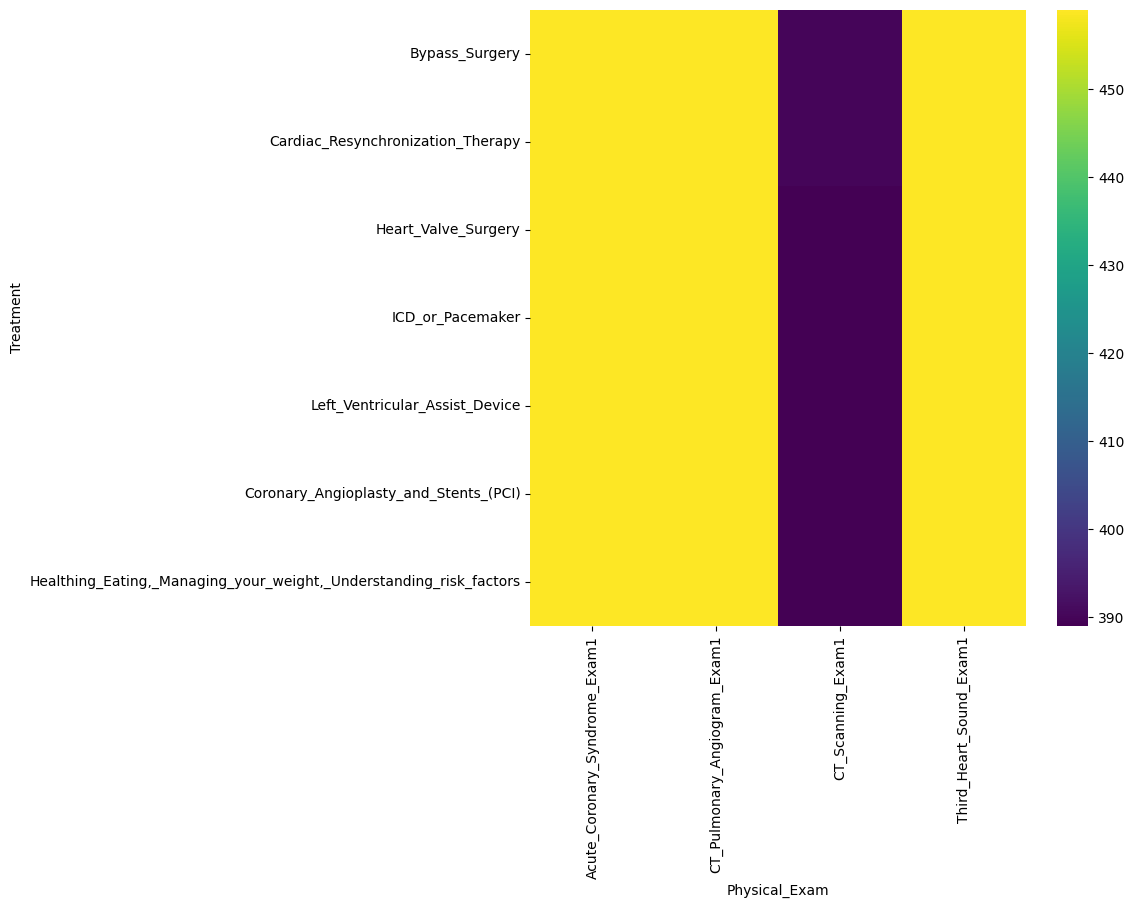

In [ ]:
# @title Physical_Exam vs Treatment

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Treatment'].value_counts()
    for x_label, grp in df.groupby('Physical_Exam')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Physical_Exam')
_ = plt.ylabel('Treatment')

**Anaysis**


<ipython-input-4-8cfe213fbedc>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cvd_counts.values, y=cvd_counts.index, palette="Reds_r")


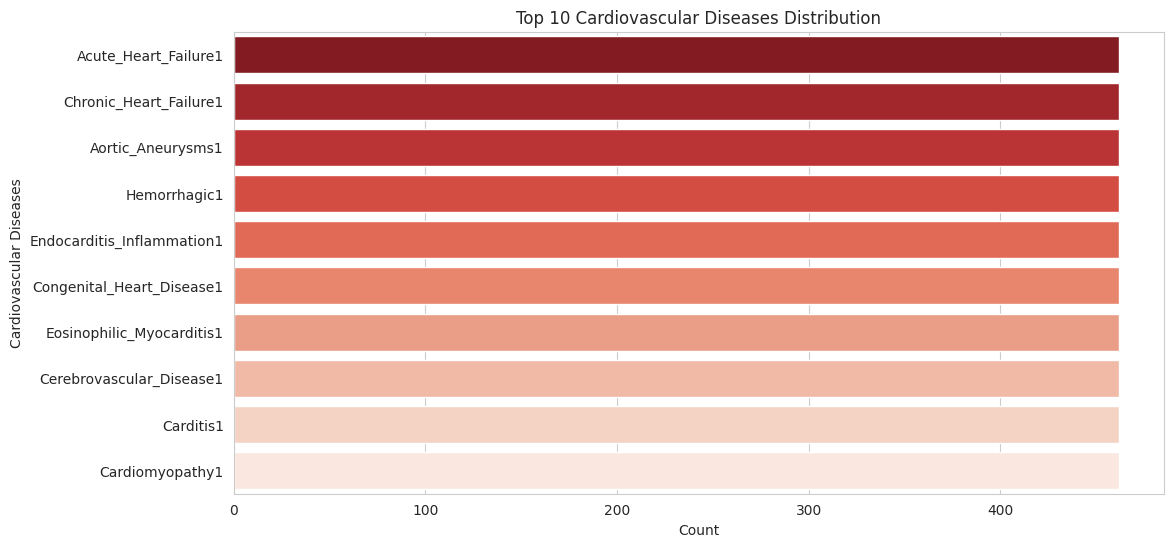

<ipython-input-4-8cfe213fbedc>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=treatment_counts.values, y=treatment_counts.index, palette="Blues_r")


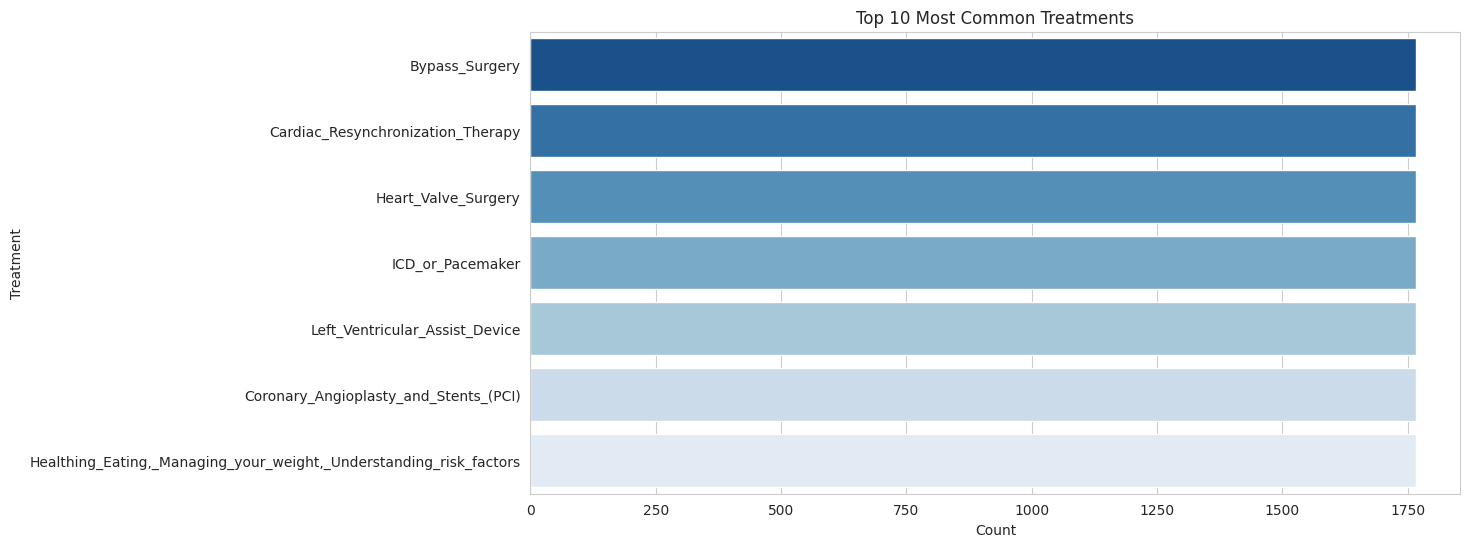

<ipython-input-4-8cfe213fbedc>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medication_counts.values, y=medication_counts.index, palette="Greens_r")


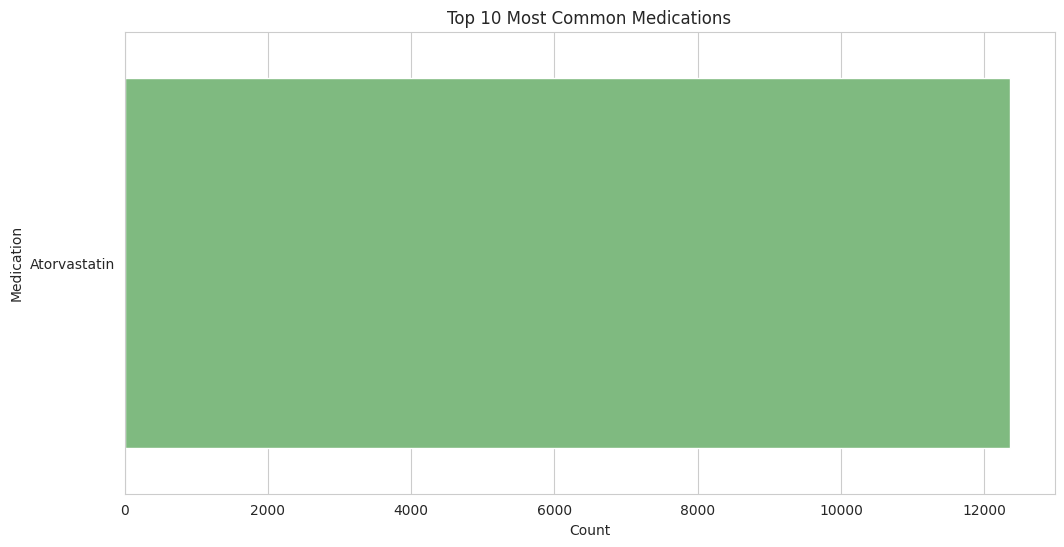

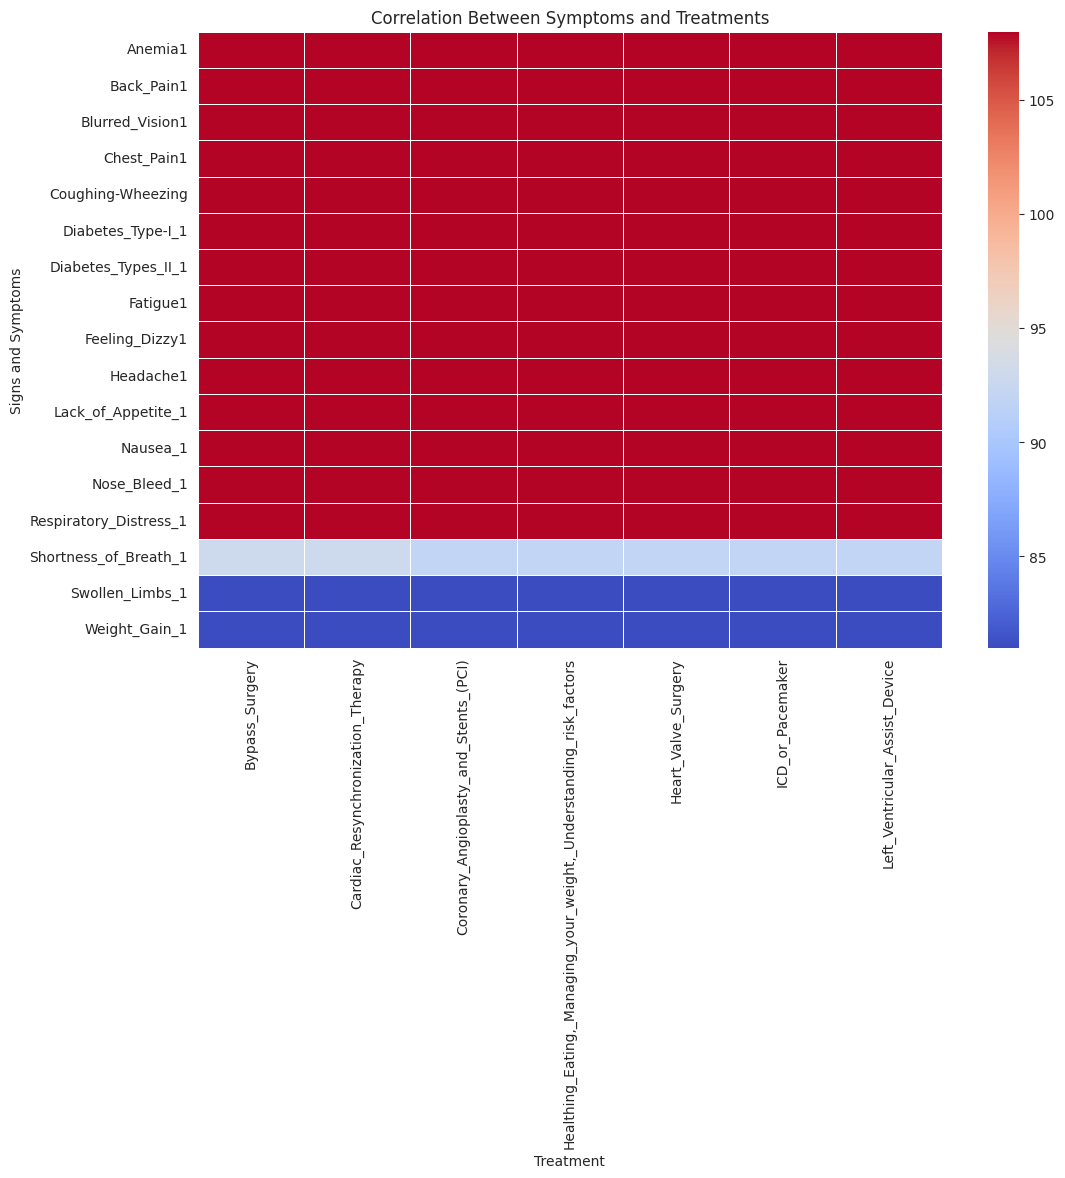

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Distribution of cardiovascular diseases
cvd_counts = df['Cardiovascular_Diseases'].value_counts().head(10)  # Top 10 diseases

plt.figure(figsize=(12, 6))
sns.barplot(x=cvd_counts.values, y=cvd_counts.index, palette="Reds_r")
plt.xlabel("Count")
plt.ylabel("Cardiovascular Diseases")
plt.title("Top 10 Cardiovascular Diseases Distribution")
plt.show()

# Common treatments
treatment_counts = df['Treatment'].value_counts().head(10)  # Top 10 treatments

plt.figure(figsize=(12, 6))
sns.barplot(x=treatment_counts.values, y=treatment_counts.index, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Treatment")
plt.title("Top 10 Most Common Treatments")
plt.show()

# Common medications
medication_counts = df['Medication'].value_counts().head(10)  # Top 10 medications

plt.figure(figsize=(12, 6))
sns.barplot(x=medication_counts.values, y=medication_counts.index, palette="Greens_r")
plt.xlabel("Count")
plt.ylabel("Medication")
plt.title("Top 10 Most Common Medications")
plt.show()

# Correlation between symptoms and treatments
symptom_treatment_counts = df.groupby(['Signs_and_Symptoms', 'Treatment']).size().reset_index(name='count')
symptom_treatment_pivot = symptom_treatment_counts.pivot(index='Signs_and_Symptoms', columns='Treatment', values='count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(symptom_treatment_pivot, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Treatment")
plt.ylabel("Signs and Symptoms")
plt.title("Correlation Between Symptoms and Treatments")
plt.show()


**Distribution of Cardiovascular diseases.**

In [ ]:
!pip install pandas matplotlib seaborn

## **Heatlh and Wellness Tracking Report**



In [ ]:
class HealthTracker:
    def __init__(self):
        self.diet = {
            'carbohydrates': 0,
            'proteins': 0,
            'healthy_fats': 0,
            'fiber': 0,
            'hydration': 0,
        }
        self.exercise = {
            'aerobic': 0,
            'strength_training': 0,
            'flexibility': 0,
            'Running': 0,
        }
        self.sleep = 0

    def track_diet(self, carbs, proteins, fats, fiber, hydration):
        self.diet['carbohydrates'] = carbs
        self.diet['proteins'] = proteins
        self.diet['healthy_fats'] = fats
        self.diet['fiber'] = fiber
        self.diet['hydration'] = hydration

    def track_exercise(self, aerobic, strength, flexibility, Running):
        self.exercise['aerobic'] = aerobic
        self.exercise['strength_training'] = strength
        self.exercise['flexibility'] = flexibility
        self.exercise['Running'] = Running

    def track_sleep(self, sleep_hours):
        self.sleep = sleep_hours

    def generate_report(self):
        report = "Health and Wellness Progress Report\n"
        report += "="*40 + "\n"
        report += "Diet Recommendations:\n"
        report += f"Carbohydrates: {self.diet['carbohydrates']}g\n"
        report += f"Proteins: {self.diet['proteins']}g\n"
        report += f"Healthy Fats: {self.diet['healthy_fats']}g\n"
        report += f"Fiber: {self.diet['fiber']}g\n"
        report += f"Hydration: {self.diet['hydration']} liters\n"
        report += "\n"

        report += "Exercise Recommendations:\n"
        report += f"Aerobic Exercise: {self.exercise['aerobic']} minutes/week\n"
        report += f"Strength Training: {self.exercise['strength_training']} minutes/week\n"
        report += f"Flexibility & Stretching: {self.exercise['flexibility']} minutes/day\n"
        report += f"Running: {self.exercise['Running']} minutes/day\n"
        report += "\n"

        report += f"Sleep: {self.sleep} hours/night\n"
        report += "="*40 + "\n"

        # Add personalized recommendations based on progress
        if self.diet['hydration'] < 2:
            report += "Recommendation: Increase water intake to at least 2 liters per day.\n"
        if self.exercise['aerobic'] < 150:
            report += "Recommendation: Increase aerobic exercise to at least 150 minutes per week.\n"
        if self.exercise['strength_training'] < 120:
            report += "Recommendation: Include strength training at least two days per week for 120 minutes.\n"
        if self.exercise['Running'] < 120:
            report += "Recommendation: Go for the walk and running on regular basis.\n"
        if self.sleep < 7:
            report += "Recommendation: Aim for at least 7 hours of sleep per night.\n"

        return report

# Example usage
tracker = HealthTracker()

# Track Diet (in grams and liters)
tracker.track_diet(carbs=250, proteins=100, fats=60, fiber=30, hydration=1.5)

# Track Exercise (in minutes)
tracker.track_exercise(aerobic=120, strength=60, flexibility=15, Running=10)

# Track Sleep (in hours)
tracker.track_sleep(sleep_hours=6)

# Generate and print the report
print(tracker.generate_report())


Health and Wellness Progress Report
Diet Recommendations:
Carbohydrates: 250g
Proteins: 100g
Healthy Fats: 60g
Fiber: 30g
Hydration: 1.5 liters

Exercise Recommendations:
Aerobic Exercise: 120 minutes/week
Strength Training: 60 minutes/week
Flexibility & Stretching: 15 minutes/day
Running: 10 minutes/day

Sleep: 6 hours/night
Recommendation: Increase water intake to at least 2 liters per day.
Recommendation: Increase aerobic exercise to at least 150 minutes per week.
Recommendation: Include strength training at least two days per week for 120 minutes.
Recommendation: Go for the walk and running on regular basis.
Recommendation: Aim for at least 7 hours of sleep per night.



**Federated Semantic Knowledge Lake Network Analysis Metrics**

In [ ]:
!pip install seaborn

<ipython-input-6-4835f724cc03>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cvd_counts.values, y=cvd_counts.index, palette="Reds_r")


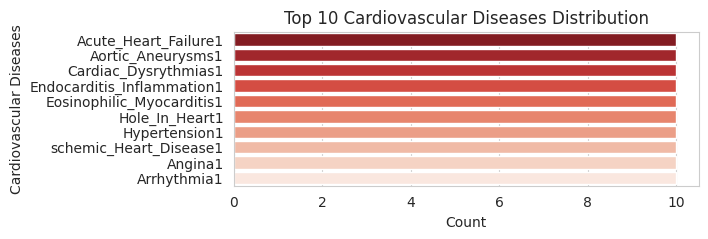

<ipython-input-6-4835f724cc03>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=treatment_counts.values, y=treatment_counts.index, palette="Blues_r")


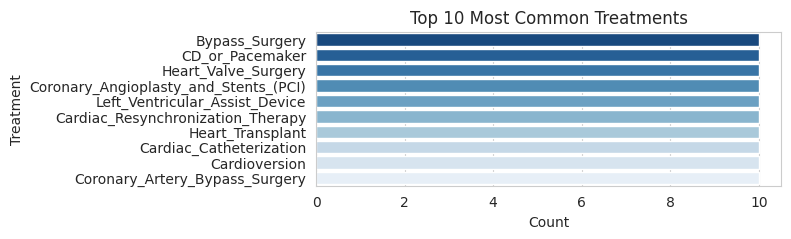

<ipython-input-6-4835f724cc03>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medication_counts.values, y=medication_counts.index, palette="Greens_r")


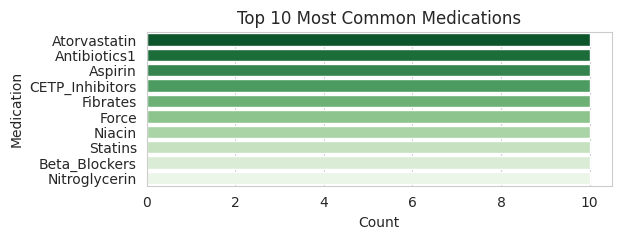

<ipython-input-6-4835f724cc03>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Signs_and_Symptoms_counts.values, y=treatment_counts.index, palette="Purples_r")


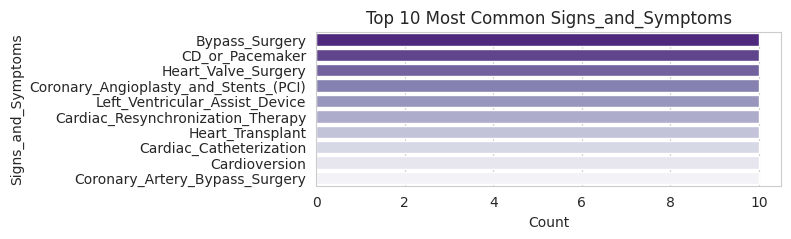

<ipython-input-6-4835f724cc03>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Physical_Exams_counts.values, y=treatment_counts.index, palette="Blues_r")


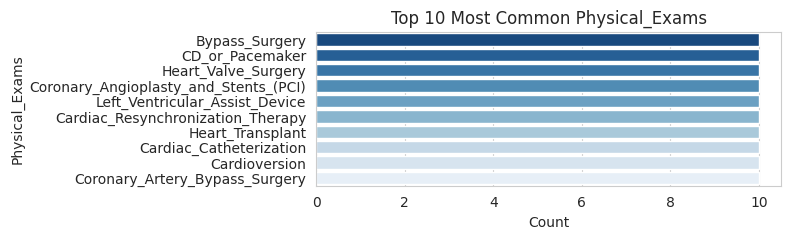

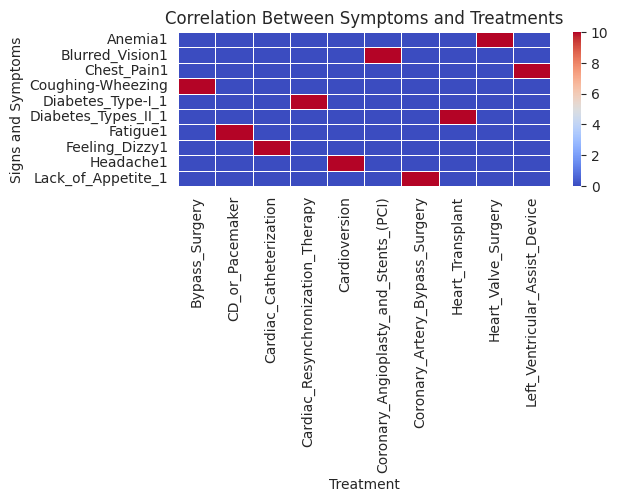

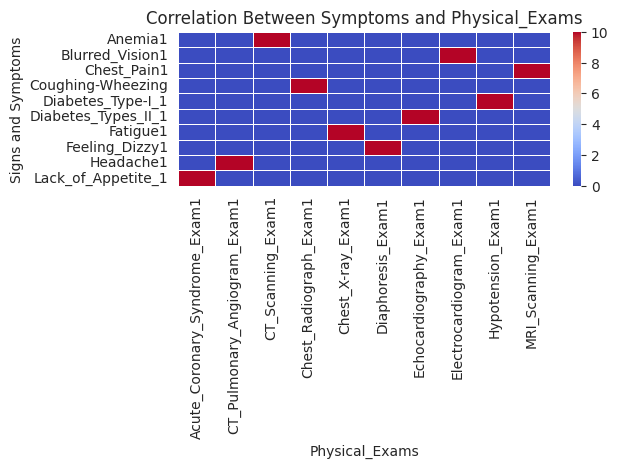

Cardiovascular Disease and Treatment Insights Report
Top 10 Cardiovascular Diseases:
Acute_Heart_Failure1: 10 occurrences
Aortic_Aneurysms1: 10 occurrences
Cardiac_Dysrythmias1: 10 occurrences
Endocarditis_Inflammation1: 10 occurrences
Eosinophilic_Myocarditis1: 10 occurrences
Hole_In_Heart1: 10 occurrences
Hypertension1: 10 occurrences
schemic_Heart_Disease1: 10 occurrences
Angina1: 10 occurrences
Arrhythmia1: 10 occurrences

Top 10 Most Common Treatments:
Bypass_Surgery: 10 occurrences
CD_or_Pacemaker: 10 occurrences
Heart_Valve_Surgery: 10 occurrences
Coronary_Angioplasty_and_Stents_(PCI): 10 occurrences
Left_Ventricular_Assist_Device: 10 occurrences
Cardiac_Resynchronization_Therapy: 10 occurrences
Heart_Transplant: 10 occurrences
Cardiac_Catheterization: 10 occurrences
Cardioversion: 10 occurrences
Coronary_Artery_Bypass_Surgery: 10 occurrences

Top 10 Most Common Medications:
Atorvastatin: 10 occurrences
Antibiotics1: 10 occurrences
Aspirin: 10 occurrences
CETP_Inhibitors: 10 occ

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set_style("whitegrid")

# Simulate a sample DataFrame (replace this with actual data)
# Assuming df is your actual dataset
df = pd.DataFrame({
    'Cardiovascular_Diseases': ['Acute_Heart_Failure1', 'Aortic_Aneurysms1', 'Cardiac_Dysrythmias1', 'Endocarditis_Inflammation1', 'Eosinophilic_Myocarditis1',
                                'Hole_In_Heart1', 'Hypertension1', 'schemic_Heart_Disease1', 'Angina1', 'Arrhythmia1'] * 10,
    'Treatment': ['Bypass_Surgery', 'CD_or_Pacemaker', 'Heart_Valve_Surgery', 'Coronary_Angioplasty_and_Stents_(PCI)', 'Left_Ventricular_Assist_Device',
                  'Cardiac_Resynchronization_Therapy', 'Heart_Transplant', 'Cardiac_Catheterization', 'Cardioversion', 'Coronary_Artery_Bypass_Surgery'] * 10,
    'Medication': ['Atorvastatin', 'Antibiotics1', 'Aspirin', 'CETP_Inhibitors', 'Fibrates', 'Force', 'Niacin', 'Statins',
                   'Beta_Blockers', 'Nitroglycerin'] * 10,
    'Signs_and_Symptoms': ['Coughing-Wheezing', 'Fatigue1', 'Anemia1', 'Blurred_Vision1', 'Chest_Pain1',
                           'Diabetes_Type-I_1', 'Diabetes_Types_II_1', 'Feeling_Dizzy1', 'Headache1', 'Lack_of_Appetite_1'] * 10,
    'Physical_Exams': ['Chest_Radiograph_Exam1', 'Chest_X-ray_Exam1', 'CT_Scanning_Exam1', 'Electrocardiogram_Exam1', 'MRI_Scanning_Exam1',
                       'Hypotension_Exam1', 'Echocardiography_Exam1', 'Diaphoresis_Exam1', 'CT_Pulmonary_Angiogram_Exam1', 'Acute_Coronary_Syndrome_Exam1'] * 10,
})

# Top 10 Cardiovascular Diseases
cvd_counts = df['Cardiovascular_Diseases'].value_counts().head(10)

# Visualization of Cardiovascular Diseases Distribution
plt.figure(figsize=(6, 2))
sns.barplot(x=cvd_counts.values, y=cvd_counts.index, palette="Reds_r")
plt.xlabel("Count")
plt.ylabel("Cardiovascular Diseases")
plt.title("Top 10 Cardiovascular Diseases Distribution")
plt.show()
###---------------------------
# Top 10 Treatments
treatment_counts = df['Treatment'].value_counts().head(10)

# Visualization of Treatments Distribution
plt.figure(figsize=(6, 2))
sns.barplot(x=treatment_counts.values, y=treatment_counts.index, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Treatment")
plt.title("Top 10 Most Common Treatments")
plt.show()
####-----------------------------------------------------------
# Top 10 Medications
medication_counts = df['Medication'].value_counts().head(10)

# Visualization of Medications Distribution
plt.figure(figsize=(6, 2))
sns.barplot(x=medication_counts.values, y=medication_counts.index, palette="Greens_r")
plt.xlabel("Count")
plt.ylabel("Medication")
plt.title("Top 10 Most Common Medications")
plt.show()
####----------------------------------------
# Top 10 Signs_and_Symptoms
Signs_and_Symptoms_counts = df['Signs_and_Symptoms'].value_counts().head(10)

# Visualization of Signs_and_Symptoms Distribution
plt.figure(figsize=(6, 2))
sns.barplot(x=Signs_and_Symptoms_counts.values, y=treatment_counts.index, palette="Purples_r")
plt.xlabel("Count")
plt.ylabel("Signs_and_Symptoms")
plt.title("Top 10 Most Common Signs_and_Symptoms")
plt.show()
###------------------------
# Top 10 Physical_Exams
Physical_Exams_counts = df['Physical_Exams'].value_counts().head(10)

# Visualization of Physical_Exams Distribution
plt.figure(figsize=(6, 2))
sns.barplot(x=Physical_Exams_counts.values, y=treatment_counts.index, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Physical_Exams")
plt.title("Top 10 Most Common Physical_Exams")
plt.show()
####-------------
# Correlation between Symptoms and Treatments
symptom_treatment_counts = df.groupby(['Signs_and_Symptoms', 'Treatment']).size().reset_index(name='count')
symptom_treatment_pivot = symptom_treatment_counts.pivot(index='Signs_and_Symptoms', columns='Treatment', values='count').fillna(0)

# Visualization of Symptoms and Treatments Correlation
plt.figure(figsize=(6, 2))
sns.heatmap(symptom_treatment_pivot, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Treatment")
plt.ylabel("Signs and Symptoms")
plt.title("Correlation Between Symptoms and Treatments")
plt.show()

####-------------------------------------------------------
# Correlation between Symptoms and Physical Exams
Physical_Exams_counts = df.groupby(['Signs_and_Symptoms', 'Physical_Exams']).size().reset_index(name='count')
symptom_Physical_Exams_pivot = Physical_Exams_counts.pivot(index='Signs_and_Symptoms', columns='Physical_Exams', values='count').fillna(0)

# Visualization of Symptoms and Physical_Exams Correlation
plt.figure(figsize=(6, 2))
sns.heatmap(symptom_Physical_Exams_pivot, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Physical_Exams")
plt.ylabel("Signs and Symptoms")
plt.title("Correlation Between Symptoms and Physical_Exams")
plt.show()
####----------------------------------------------------------


####--------------------- Report Generation-----------------------------------------------------
def generate_report(cvd_counts, treatment_counts, medication_counts, symptom_treatment_pivot):
    report = "Cardiovascular Disease and Treatment Insights Report\n"
    report += "="*60 + "\n"

    # Cardiovascular Diseases
    report += "Top 10 Cardiovascular Diseases:\n"
    for disease, count in cvd_counts.items():
        report += f"{disease}: {count} occurrences\n"

    report += "\nTop 10 Most Common Treatments:\n"
    for treatment, count in treatment_counts.items():
        report += f"{treatment}: {count} occurrences\n"

    report += "\nTop 10 Most Common Medications:\n"
    for medication, count in medication_counts.items():
        report += f"{medication}: {count} occurrences\n"

    # Symptoms and Treatments Correlation
    report += "\nCorrelation Between Symptoms and Treatments:\n"
    report += f"{symptom_treatment_pivot.to_string()}\n"

     # Symptoms and Physical_Exams Correlation
    report += "\nCorrelation Between Symptoms and Physical_Exams:\n"
    report += f"{symptom_Physical_Exams_pivot.to_string()}\n"

    report += "="*60 + "\n"
    return report

# Generate the report
report = generate_report(cvd_counts, treatment_counts, medication_counts, symptom_treatment_pivot)

# Print the report
print(report)


Health and Wellness Progress Report
Diet Recommendations:
Carbohydrates: 250g
Proteins: 100g
Healthy Fats: 60g
Fiber: 30g
Hydration: 1.5 liters

Exercise Recommendations:
Aerobic Exercise: 120 minutes/week
Strength Training: 100 minutes/week
Flexibility & Stretching: 70 minutes/day
Running : 150 minutes/day

Sleep: 6 hours/night
Recommendation: Increase water intake to at least 2 liters per day.
Recommendation: Increase aerobic exercise to at least 150 minutes per week.
Recommendation: Include strength training at least two days per week for 120 minutes.
Recommendation: Aim for at least 7 hours of sleep per night.



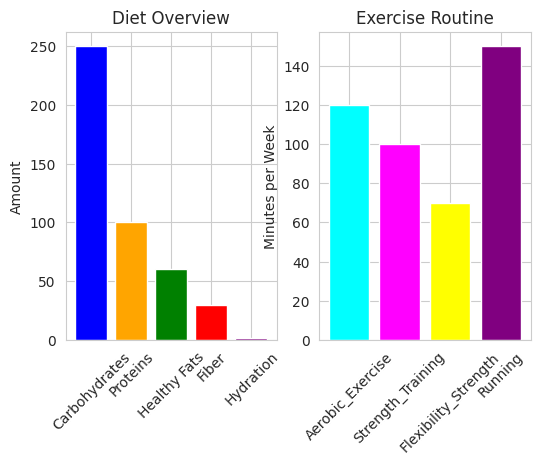

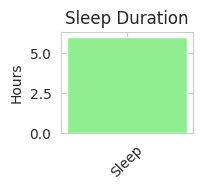

In [ ]:
import matplotlib.pyplot as plt

class HealthTracker:
    def __init__(self):
        self.diet = {
            'carbohydrates': 0,
            'proteins': 0,
            'healthy_fats': 0,
            'fiber': 0,
            'hydration': 0,
        }
        self.exercise = {
            'aerobic': 0,
            'strength_training': 0,
            'flexibility': 0,
            'Running': 0,
        }
        self.sleep = 0

    def track_diet(self, carbs, proteins, fats, fiber, hydration):
        self.diet['carbohydrates'] = carbs
        self.diet['proteins'] = proteins
        self.diet['healthy_fats'] = fats
        self.diet['fiber'] = fiber
        self.diet['hydration'] = hydration

    def track_exercise(self, aerobic, strength, flexibility, Running):
        self.exercise['aerobic'] = aerobic
        self.exercise['strength_training'] = strength
        self.exercise['flexibility'] = flexibility
        self.exercise['Running'] = Running

    def track_sleep(self, sleep_hours):
        self.sleep = sleep_hours

    def generate_report(self):
        report = "Health and Wellness Progress Report\n"
        report += "="*40 + "\n"
        report += "Diet Recommendations:\n"
        report += f"Carbohydrates: {self.diet['carbohydrates']}g\n"
        report += f"Proteins: {self.diet['proteins']}g\n"
        report += f"Healthy Fats: {self.diet['healthy_fats']}g\n"
        report += f"Fiber: {self.diet['fiber']}g\n"
        report += f"Hydration: {self.diet['hydration']} liters\n"
        report += "\n"

        report += "Exercise Recommendations:\n"
        report += f"Aerobic Exercise: {self.exercise['aerobic']} minutes/week\n"
        report += f"Strength Training: {self.exercise['strength_training']} minutes/week\n"
        report += f"Flexibility & Stretching: {self.exercise['flexibility']} minutes/day\n"
        report += f"Running : {self.exercise['Running']} minutes/day\n"
        report += "\n"

        report += f"Sleep: {self.sleep} hours/night\n"
        report += "="*40 + "\n"

        # Add personalized recommendations based on progress
        if self.diet['hydration'] < 2:
            report += "Recommendation: Increase water intake to at least 2 liters per day.\n"
        if self.exercise['aerobic'] < 150:
            report += "Recommendation: Increase aerobic exercise to at least 150 minutes per week.\n"
        if self.exercise['strength_training'] < 120:
            report += "Recommendation: Include strength training at least two days per week for 120 minutes.\n"
        if self.exercise['Running'] < 120:
            report += "Recommendation: Go for the walk and running on regular basis.\n"
        if self.sleep < 7:
            report += "Recommendation: Aim for at least 7 hours of sleep per night.\n"

        return report

    def visualize_results(self):
        # Plot diet macronutrients
        labels = ['Carbohydrates', 'Proteins', 'Healthy Fats', 'Fiber', 'Hydration']
        values = [self.diet['carbohydrates'], self.diet['proteins'], self.diet['healthy_fats'], self.diet['fiber'], self.diet['hydration']]

        plt.figure(figsize=(6, 4))
        plt.subplot(1, 2, 1)
        plt.bar(labels, values, color=['blue', 'orange', 'green', 'red', 'purple'])
        plt.title('Diet Overview')
        plt.ylabel('Amount')
        plt.xticks(rotation=45, fontsize=10)

        # Plot exercise routine
        exercise_labels = ['Aerobic_Exercise', 'Strength_Training', 'Flexibility_Strength', 'Running']
        exercise_values = [self.exercise['aerobic'], self.exercise['strength_training'], self.exercise['flexibility'], self.exercise['Running']]

        plt.subplot(1, 2, 2)
        plt.bar(exercise_labels, exercise_values, color=['cyan', 'magenta', 'yellow', 'Purple'])
        plt.title('Exercise Routine')
        plt.ylabel('Minutes per Week')
        plt.xticks(rotation=45, fontsize=10)

        # Plot sleep
        plt.figure(figsize=(2, 2))
        plt.bar(['Sleep'], [self.sleep], color='lightgreen')
        plt.title('Sleep Duration')
        plt.ylabel('Hours')
        plt.xticks(rotation=45, fontsize=10)
        plt.tight_layout()
        plt.show()

# Example usage
tracker = HealthTracker()

# Track Diet (in grams and liters)
tracker.track_diet(carbs=250, proteins=100, fats=60, fiber=30, hydration=1.5)

# Track Exercise (in minutes)
tracker.track_exercise(aerobic=120, strength=100, flexibility=70, Running=150)

# Track Sleep (in hours)
tracker.track_sleep(sleep_hours=6)

# Generate and print the report
print(tracker.generate_report())

# Visualize the results
tracker.visualize_results()


**Early Screening Tests**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/content/FedX Query result.csv"  # Update if needed
df = pd.read_csv(file_path)

# Function to extract meaningful labels if URIs are present
def extract_label(value):
    """Extracts human-readable labels from URIs or keeps the original value."""
    if isinstance(value, str) and ('#' in value or '/' in value):
        return value.split('#')[-1].split('/')[-1]
    return value

# Apply the function to all string values
df = df.map(lambda x: extract_label(x) if isinstance(x, str) else x)

# Standardize column names (convert to lowercase and strip spaces)
df.columns = [col.lower().strip() for col in df.columns]

# Dynamically find relevant columns
medical_condition_col = next((col for col in df.columns if "condition" in col.lower()), None)
screening_test_col = next((col for col in df.columns if "screen" in col.lower() or "test" in col.lower()), None)

# Check if required columns exist
if not medical_condition_col or not screening_test_col:
    print("\n🚨 Error: Required columns for medical conditions or screenings are missing!")
    print("🔍 Available columns in dataset:", df.columns)
else:
    print(f"✅ Using '{medical_condition_col}' for medical conditions")
    print(f"✅ Using '{screening_test_col}' for screening tests")

    # Define high-risk conditions (standardized for comparison)
    high_risk_conditions = ["high_cholesterol", "diabetes", "smoking", "hypertension"]

    # Convert column values to lowercase for case-insensitive matching
    df[medical_condition_col] = df[medical_condition_col].astype(str).str.lower()

    # Identify high-risk patients
    df_high_risk = df[df[medical_condition_col].isin(high_risk_conditions)]

    if df_high_risk.empty:
        print("\n⚠️ No high-risk patients found in the dataset.")
    else:
        print(f"\n📊 Found {len(df_high_risk)} high-risk patients.")

        # Identify preventative screenings
        screening_tests = ["ecg", "cholesterol_test", "bloodpressure_test", "stress_test"]
        df[screening_test_col] = df[screening_test_col].astype(str).str.lower()

        df_screened = df_high_risk[df_high_risk[screening_test_col].isin(screening_tests)]

        if df_screened.empty:
            print("\n⚠️ No high-risk patients received preventative screenings.")
        else:
            print(f"\n📈 {len(df_screened)} high-risk patients received screenings.")

            # Count occurrences of each screening test
            screening_counts = df_screened[screening_test_col].value_counts()

            # Plot preventative screenings
            plt.figure(figsize=(12, 6))
            sns.barplot(x=screening_counts.index, y=screening_counts.values, palette="Blues_r")
            plt.xlabel("Screening Test", fontsize=12)
            plt.ylabel("Number of Patients", fontsize=12)
            plt.title("Preventative Screenings for High-Risk Cardiovascular Patients", fontsize=14)
            plt.xticks(rotation=45)
            plt.grid(axis="y", linestyle="--", alpha=0.7)
            plt.show()

            # Calculate and display screening percentage
            screened_percentage = (len(df_screened) / len(df_high_risk) * 100)
            print(f"\n✅ Percentage of high-risk patients who received early screenings: {screened_percentage:.2f}%")


✅ Using 'medicalcondition' for medical conditions
✅ Using 'blood_tests' for screening tests

⚠️ No high-risk patients found in the dataset.
